# Winter 2024 Code Jam: Winter Vacations Optimized Route

In [ ]:
#Import libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import networkx as nx
import json
from sklearn.utils import shuffle
from google.colab import drive
from google.colab import files

In [ ]:
# Mount google drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List contents of folder

path = '/content/drive/My Drive/dec_24_code_jam'

In [ ]:
#Import datasets

#Create file path

file_path1 = '/content/drive/My Drive/dec_24_code_jam/worldwide_resorts.csv'
file_path2 = '/content/drive/My Drive/dec_24_code_jam/north_american_ski_resort_data.csv'

#Read the file

ski_resort1 = pd.read_csv(file_path1, encoding = 'ISO-8859-1')
ski_resort2 = pd.read_csv(file_path2)


# Data Preprocessing

In [ ]:
# Review unique values to get value for US country to filter dataset down

ski_resort1['Country'].unique()

array(['Norway', 'Austria', 'Canada', 'New Zealand', 'Chile', 'Germany',
       'Switzerland', 'Italy', 'France', 'United Kingdom',
       'United States', 'Andorra', 'Australia', 'Argentina', 'Finland',
       'Japan', 'Slovenia', 'Bulgaria', 'Spain', 'Sweden', 'Lebanon',
       'Russia', 'Ukraine', 'Georgia', 'Serbia', 'Turkey', 'Slovakia',
       'Poland', 'Bosnia and Herzegovina', 'Czech Republic', 'Iran',
       'South Korea', 'Romania', 'Greece', 'Liechtenstein', 'Lithuania',
       'Kazakhstan', 'China'], dtype=object)

In [ ]:
# Filter the worldwide dataset to only include US countries

ski_resort1 = ski_resort1[ski_resort1['Country'] == 'United States']

In [ ]:
# Review a sorted list of unique values from resort names in resort1 dataset so we can pick 9 that appear in both datasets

sorted(ski_resort1['Resort'].unique())

['49 Degrees North Mountain Resort',
 'Alpine Meadows',
 'Alta',
 'Alyeska Resort-Girdwood',
 'Angel Fire',
 'Apache',
 'Arapahoe Basin',
 'Aspen Highlands',
 'Aspen Mountain',
 'Bald Mountain-Sun Valley',
 'Bear Valley',
 'Beaver Creek',
 'Big Sky Resort',
 'Bolton Valley',
 'Breckenridge',
 'Bretton Woods',
 'Brian Head',
 'Bridger Bowl-Bozeman',
 'Brighton',
 'Copper Mountain',
 'Crested Butte',
 'Crystal Mountain-WA-',
 'Deer Valley',
 'Donner Ski Ranch',
 'Eldora Mountain',
 'Gore Mountain',
 'Heavenly',
 'Howelsen Hill-Steamboat Springs',
 'Hunter Mountain',
 'Jackson Hole',
 'Jay Peak',
 'Keystone',
 'Killington',
 'Kirkwood',
 'Loon Mountain',
 'Loveland',
 'Mammoth Mountain',
 'Montage Mountain Resort',
 'Mount Snow',
 'Mt. Bachelor',
 'Mt. Baker',
 'Mt. Hood Meadows',
 'Mt. Hood Skibowl',
 'Mt. Rose',
 'Northstar California Resort',
 'Okemo',
 'Park City',
 'Powder Mountain',
 'Purgatory-Durango',
 'Red Lodge Mountain',
 'Sandia Peak',
 'Schweitzer Mountain Resort',
 "Smuggle

In [ ]:
# Review a sorted list of unique values from resort names in resort2 dataset so we can pick 9 that appear in both datasets

sorted(ski_resort2['Resort'].unique())

['49 Degrees North',
 'Abenaki Ski Area',
 'Afton Alps',
 'Alpine Valley',
 'Alpine Valley Resort',
 'Alta Sierra',
 'Alta Ski Area ',
 'Alyeska Resort ',
 'Andes Tower Hills',
 'Angel Fire Resort [41]',
 'Anthony Lakes',
 'Apex Mountain Resort',
 'Appalachian Ski Mountain ',
 'Apple Mountain',
 'Arapahoe Basin',
 'Arctic Valley',
 'Arizona Snowbowl',
 'Arrowhead Recreation Area',
 'Aspen Highlands',
 'Aspen Mountain',
 'Attitash Mountain Resort',
 'Badger Mountain',
 'Badger Pass',
 'Baker Mountain',
 'Bald Mountain',
 'Bear Creek Mountain Resort',
 'Bear Mountain',
 'Bear Paw Ski Bowl',
 'Bear Valley',
 'Beartooth Basin Summer Ski Area',
 'Beartown Ski Area',
 'Beaver Creek',
 'Beaver Mountain',
 'Beech Mountain Resort ',
 'Belleyare Ski Center',
 'Berkshire East',
 'Big Creek',
 'Big Powderhorn Mountain Resort',
 'Big Rock',
 'Big Sky Resort',
 'Big Snow Resort (includes Blackjack and Indianhead Mountain)',
 'Big Squaw Mountain',
 'Big Tupper Ski Area',
 'Big White Ski Resort ',
 'B

In [ ]:
#Data cleaning and preprocessing

In [ ]:
# Initial review of ski_resorts1 df
ski_resort1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 21 to 490
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   78 non-null     int64  
 1   Resort               78 non-null     object 
 2   Latitude             78 non-null     float64
 3   Longitude            78 non-null     float64
 4   Country              78 non-null     object 
 5   Continent            78 non-null     object 
 6   Price                78 non-null     int64  
 7   Season               78 non-null     object 
 8   Highest point        78 non-null     int64  
 9   Lowest point         78 non-null     int64  
 10  Beginner slopes      78 non-null     int64  
 11  Intermediate slopes  78 non-null     int64  
 12  Difficult slopes     78 non-null     int64  
 13  Total slopes         78 non-null     int64  
 14  Longest run          78 non-null     int64  
 15  Snow cannons         78 non-null     int64  


The table contains twenty five columns. Columns: 'Resort', 'Country', 'Continent', 'Season', 'Child friendly', 'Snowparks', 'Nightskiing', and 'Summer skiing' all contain the data type: `object`. Columns: 'Latitude' and 'Longitude' contain the data type: `float64`. The rest of the columns contain the data type: `int64`.

Each column represents:

- `'ID'` — unique ID identifier
- `'Resort'` — unique resort name
- `'Latitude'` — latitude of the resort
- `'Longitude'` - longitude of the resort
- `'Country'` — the country the resort is in
- `'Continent'` — the continent the resort is in
- `'Price'` — price of a day ticket
- `'Season'` — months the resort is open through
- `'Highest point'` — the peak elevation
- `'Lowest point'` — the base elevation
- `'Beginner slopes'` - the number of available beginner slopes
- `'Intermediate slopes'` — the number of available intermediate slopes
- `'Difficult slopes'` — the number of available difficult slopes
- `'Total slopes'` — the number of total available slopes
- `'Longest run'` - the run of the slopes
- `'Snow cannons'` — the amount of snow cannons present
- `'Surface lifts'` — the amount of surface lifts available
- `'Chair lifts'` — the amount of chair lifts available
- `'Gondola lifts'` — the amount of gondola lifts available
- `'Total lifts'` — the total amount of all lifts available
- `'Lift capacity'` — the toal amount the lifts can withstand
- `'Child friendly'` — whether children are allowed or not
- `'Snowparks'` - whether there are snowparks or not
- `'Nightskiing'` — whether the resort offers nightskiing
- `'Summer skiing'` — whether the resort offers summer skiing

The number of column values are equal, which indicates that there are no missing values in the data. The style in some of the column names aren't preferential as they don't contain units of measure. Such columns aren't relevant to this data analysis. Necessary columns will thus be dropped prior to further data analysis. Some columns contain the same information as the ski_resort1 data, but are named differently. These columns will be renamed.

In [ ]:
# dropping unecessary columns from ski_resort1 data

ski_resort1.drop(['ID', 'Highest point', 'Lowest point', 'Country', 'Continent', 'Price', 'Season', 'Beginner slopes', 'Intermediate slopes', 'Snow cannons', 'Surface lifts', 'Chair lifts', 'Gondola lifts', 'Lift capacity', 'Snowparks', 'Summer skiing', 'Child friendly', 'Longest run'], axis = 1, inplace = True)

In [ ]:
# checking updated ski_resort1 data

ski_resort1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 21 to 490
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Resort            78 non-null     object 
 1   Latitude          78 non-null     float64
 2   Longitude         78 non-null     float64
 3   Difficult slopes  78 non-null     int64  
 4   Total slopes      78 non-null     int64  
 5   Total lifts       78 non-null     int64  
 6   Nightskiing       78 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 4.9+ KB


'ID', 'Country', 'Continent', 'Price', 'Season', 'Beginner slopes', 'Intermediate slopes', 'Snow cannons', 'Surface lifts', 'Chair lifts', 'Gondola lifts', 'Lift capacity', 'Snowparks', 'Summer skiing', and 'Child friendly' columns have been removed.

In [ ]:
# Review list of column names in the ski_resort2 table in ascending order

display(sorted(ski_resort1.columns))

['Difficult slopes',
 'Latitude',
 'Longitude',
 'Nightskiing',
 'Resort',
 'Total lifts',
 'Total slopes']

In [ ]:
# Filtering resorts1 df for specific locations

# List of resorts:

resorts1 = [

    'Angel Fire', 'Crested Butte', 'Jackson Hole', 'Park City',

    'Powder Mountain', 'Sandia Peak', 'Snowmass', 'Telluride', 'Vail'
]

# Filter the DataFrame to include only the selected resorts

filtered_ski_resort1 = ski_resort1[ski_resort1['Resort'].isin(resorts1)]

# Display the filtered DataFrame

display(filtered_ski_resort1)

,Resort,Latitude,Longitude,Difficult slopes,Total slopes,Total lifts,Nightskiing
24,Crested Butte,38.869820,-106.984043,25,121,15,No
25,Jackson Hole,34.641109,-98.676192,50,116,13,No
26,Park City,40.646092,-111.497996,71,250,41,Yes
90,Vail,39.644021,-106.380167,93,234,31,No
154,Snowmass,39.331651,-106.986156,111,236,21,Yes
164,Powder Mountain,48.877358,-120.767615,55,135,9,Yes
217,Telluride,37.937494,-107.812285,29,86,20,No
244,Angel Fire,36.393088,-105.285009,7,75,7,Yes
456,Sandia Peak,35.210045,-106.449650,3,31,6,No


In [ ]:
# Initial review of ski_resorts2 df

ski_resort2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Resort                    462 non-null    object
 1   City                      462 non-null    object
 2   State                     462 non-null    object
 3   Peak elevation (ft)       462 non-null    int64 
 4   Base elevation (ft)       462 non-null    int64 
 5   Vertical drop (ft)        462 non-null    int64 
 6   Skiable acreage           462 non-null    int64 
 7   Total trails              462 non-null    int64 
 8   Total lifts               462 non-null    int64 
 9   Avg annual snowfall (in)  462 non-null    int64 
 10  Lift ticket (USD)         462 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 39.8+ KB


The table contains eleven columns. Columns: 'Resort', 'City', and 'State' all contain the data type: `object`. The rest of the columns contain the data type: `int64`.

Each column represents:

- `'Resort'` — unique resort name
- `'City'` — the city the resort is located in
- `'State'` — the state the resort is in
- `'Peak elevation (ft)'` - the peak elevation in feet
- `'Base elevation (ft)'` — the base elevation in feet
- `'Vertical drop'` — the vertical drop in feet
- `'Skiable acreage'` — how much of the area is deemed skiable
- `'Total trails'` — number of trails available
- `'Total lifts'` — number of lifts available
- `'Avg annual snowfall (in)'` — annual snowfall recieved in inches
- `'Lift ticket (USD)'` - the cost of day ticket pass per person

The number of column values are equal, which indicates that there are no missing values in the data. The style in the column names are preferential as is and do not need to be changed. There are two columns which aren't needed in this data: 'Skiable acreage' and 'Lift ticket (USD)'. These columns will be removed before subsequen data analysis.

In [ ]:
# dropping unecessary columns from ski_resort2 data

ski_resort2.drop(['Skiable acreage', 'Lift ticket (USD)', 'Total trails'], axis = 1, inplace = True)

In [ ]:
# checking updated ski_resort2 data

ski_resort2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Resort                    462 non-null    object
 1   City                      462 non-null    object
 2   State                     462 non-null    object
 3   Peak elevation (ft)       462 non-null    int64 
 4   Base elevation (ft)       462 non-null    int64 
 5   Vertical drop (ft)        462 non-null    int64 
 6   Total lifts               462 non-null    int64 
 7   Avg annual snowfall (in)  462 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 29.0+ KB


'Skiable acreage', 'Lift ticket (USD)', and 'Total trails' columns have been removed.

In [ ]:
# the list of column names in the ski_resort2 table in ascending order

display(sorted(ski_resort2.columns))

['Avg annual snowfall (in)',
 'Base elevation (ft)',
 'City',
 'Peak elevation (ft)',
 'Resort',
 'State',
 'Total lifts',
 'Vertical drop (ft)']

In [ ]:
# Filtering ski_resorts2 for specific locations

# List of resorts:

resorts2 = [

    'Angel Fire Resort [41]', 'Crested Butte', 'Jackson Hole Mountain Resort', 'Park City Mountain Resort',

    'Powder Mountain', 'Sandia Peak', 'Snowmass', 'Telluride Ski Resort', 'Vail Ski Resort'

]

# Filter the DataFrame to include only the selected resorts

filtered_ski_resort2 = ski_resort2[ski_resort2['Resort'].isin(resorts2)]

# Display the filtered DataFrame

display(filtered_ski_resort2)

,Resort,City,State,Peak elevation (ft),Base elevation (ft),Vertical drop (ft),Total lifts,Avg annual snowfall (in)
2,Sandia Peak,Albuquerque,New Mexico,10378,8678,1700,5,100
8,Angel Fire Resort [41],Angel Fire,New Mexico,10677,8600,2077,7,210
17,Snowmass,Aspen,Colorado,12510,8104,4406,17,300
95,Crested Butte,Crested Butte,Colorado,12170,9115,3055,16,300
112,Powder Mountain,Eden,Utah,9422,6900,2205,9,500
312,Park City Mountain Resort,Park City,Utah,10000,6900,3100,41,360
397,Telluride Ski Resort,Telluride,Colorado,13150,8725,4425,18,309
400,Jackson Hole Mountain Resort,Teton Village,Wyoming,10450,6311,4139,15,459
421,Vail Ski Resort,Vail,Colorado,11570,8120,3450,31,354


Our specific travel destinatons are as shown. In order to further process and accurately merge the data from ski_resort1 and ski_resort2, it is necessary to have the same 'Resort' column entry names for the respective locations. Therefore, it is necessary to rename the column entries.

In [ ]:
# renaming variables to match ski_resort1 "Resort" variable locations

resort2_rename = {

    'Angel Fire Resort [41]': 'Angel Fire',

    'Telluride Ski Resort': 'Telluride',

    'Jackson Hole Mountain Resort': 'Jackson Hole',

    'Vail Ski Resort': 'Vail',

    'Park City Mountain Resort': 'Park City'
}

ski_resort2['Resort'] = ski_resort2['Resort'].replace(resort2_rename)

In [ ]:
# Filtering the data for resorts:

resorts = [
    'Angel Fire', 'Crested Butte', 'Jackson Hole', 'Park City',
    'Powder Mountain', 'Sandia Peak', 'Snowmass', 'Telluride', 'Vail'
]

# Filtering both DataFrames

filtered_ski_resort1 = ski_resort1[ski_resort1['Resort'].isin(resorts)]

filtered_ski_resort2 = ski_resort2[ski_resort2['Resort'].isin(resorts)]

# Merging the two DataFrames on 'Resort'

merged_resorts = pd.merge(filtered_ski_resort1, filtered_ski_resort2, on = 'Resort', suffixes=('_1', '_2'))

display(merged_resorts)

,Resort,Latitude,Longitude,Difficult slopes,Total slopes,Total lifts_1,Nightskiing,City,State,Peak elevation (ft),Base elevation (ft),Vertical drop (ft),Total lifts_2,Avg annual snowfall (in)
0,Crested Butte,38.869820,-106.984043,25,121,15,No,Crested Butte,Colorado,12170,9115,3055,16,300
1,Jackson Hole,34.641109,-98.676192,50,116,13,No,Teton Village,Wyoming,10450,6311,4139,15,459
2,Park City,40.646092,-111.497996,71,250,41,Yes,Park City,Utah,10000,6900,3100,41,360
3,Vail,39.644021,-106.380167,93,234,31,No,Vail,Colorado,11570,8120,3450,31,354
4,Snowmass,39.331651,-106.986156,111,236,21,Yes,Aspen,Colorado,12510,8104,4406,17,300
5,Powder Mountain,48.877358,-120.767615,55,135,9,Yes,Eden,Utah,9422,6900,2205,9,500
6,Telluride,37.937494,-107.812285,29,86,20,No,Telluride,Colorado,13150,8725,4425,18,309
7,Angel Fire,36.393088,-105.285009,7,75,7,Yes,Angel Fire,New Mexico,10677,8600,2077,7,210
8,Sandia Peak,35.210045,-106.449650,3,31,6,No,Albuquerque,New Mexico,10378,8678,1700,5,100


The data from the first and second datasets have ben merged. All of the columns look good, except for the 'Total_lifts 1' and 'Total_lifts 2' columns. Both of these columns represent the number of lifts available from each dataset for each resort. These columns will need to be merged together to create a 'Total lifts' column.

In [ ]:
# Taking the maximum number of lifts per location

merged_resorts['Total lifts'] = merged_resorts[['Total lifts_1', 'Total lifts_2']].max(axis=1)

# Dropping the old columns

merged_resorts = merged_resorts.drop(columns = ['Total lifts_1', 'Total lifts_2'])

display(merged_resorts)

,Resort,Latitude,Longitude,Difficult slopes,Total slopes,Nightskiing,City,State,Peak elevation (ft),Base elevation (ft),Vertical drop (ft),Avg annual snowfall (in),Total lifts
0,Crested Butte,38.869820,-106.984043,25,121,No,Crested Butte,Colorado,12170,9115,3055,300,16
1,Jackson Hole,34.641109,-98.676192,50,116,No,Teton Village,Wyoming,10450,6311,4139,459,15
2,Park City,40.646092,-111.497996,71,250,Yes,Park City,Utah,10000,6900,3100,360,41
3,Vail,39.644021,-106.380167,93,234,No,Vail,Colorado,11570,8120,3450,354,31
4,Snowmass,39.331651,-106.986156,111,236,Yes,Aspen,Colorado,12510,8104,4406,300,21
5,Powder Mountain,48.877358,-120.767615,55,135,Yes,Eden,Utah,9422,6900,2205,500,9
6,Telluride,37.937494,-107.812285,29,86,No,Telluride,Colorado,13150,8725,4425,309,20
7,Angel Fire,36.393088,-105.285009,7,75,Yes,Angel Fire,New Mexico,10677,8600,2077,210,7
8,Sandia Peak,35.210045,-106.449650,3,31,No,Albuquerque,New Mexico,10378,8678,1700,100,6


In [ ]:
# Renaming columns

merged_resorts = merged_resorts.rename(columns={
    'Resort': 'resort',
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    'Difficult slopes': 'difficult_slopes',
    'Total slopes': 'total_slopes',
    'Nightskiing': 'nightskiing',
    'City': 'city',
    'State': 'state',
    'Peak elevation (ft)': 'peak_elevation',
    'Base elevation (ft)': 'base_elevation',
    'Vertical drop (ft)': 'vertical_drop',
    'Avg annual snowfall (in)': 'avg_annual_snowfall',
    'Total lifts': 'total_lifts'
    })

merged_resorts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resort               9 non-null      object 
 1   latitude             9 non-null      float64
 2   longitude            9 non-null      float64
 3   difficult_slopes     9 non-null      int64  
 4   total_slopes         9 non-null      int64  
 5   nightskiing          9 non-null      object 
 6   city                 9 non-null      object 
 7   state                9 non-null      object 
 8   peak_elevation       9 non-null      int64  
 9   base_elevation       9 non-null      int64  
 10  vertical_drop        9 non-null      int64  
 11  avg_annual_snowfall  9 non-null      int64  
 12  total_lifts          9 non-null      int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.0+ KB


# Exploratory Data Analysis

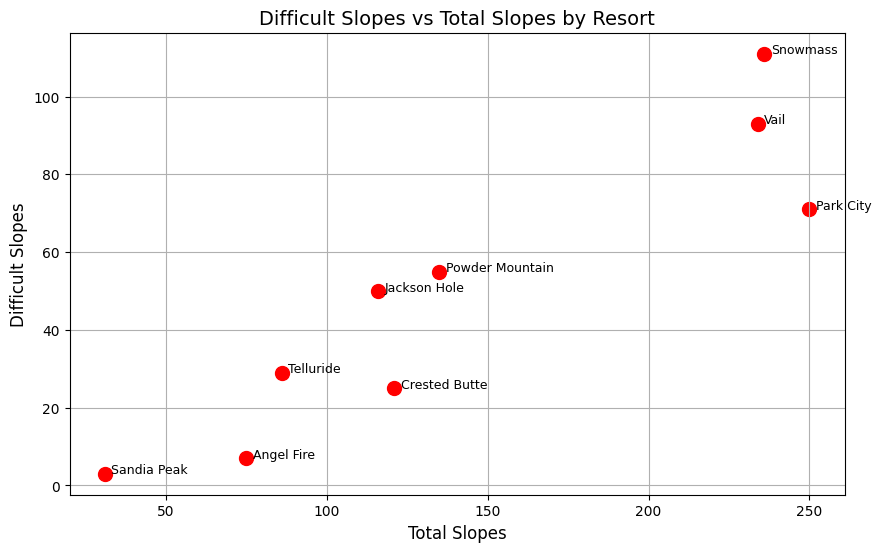

In [ ]:
# Scatterplot of difficult slopes vs total slopes

plt.figure(figsize=(10, 6))
plt.scatter(merged_resorts['total_slopes'], merged_resorts['difficult_slopes'], color='red', s=100)

# Annotate each point with the resort name
for i, resort in enumerate(merged_resorts['resort']):
    plt.text(merged_resorts['total_slopes'][i] + 2, merged_resorts['difficult_slopes'][i], resort, fontsize=9)

# Add labels and title
plt.xlabel('Total Slopes', fontsize=12)
plt.ylabel('Difficult Slopes', fontsize=12)
plt.title('Difficult Slopes vs Total Slopes by Resort', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

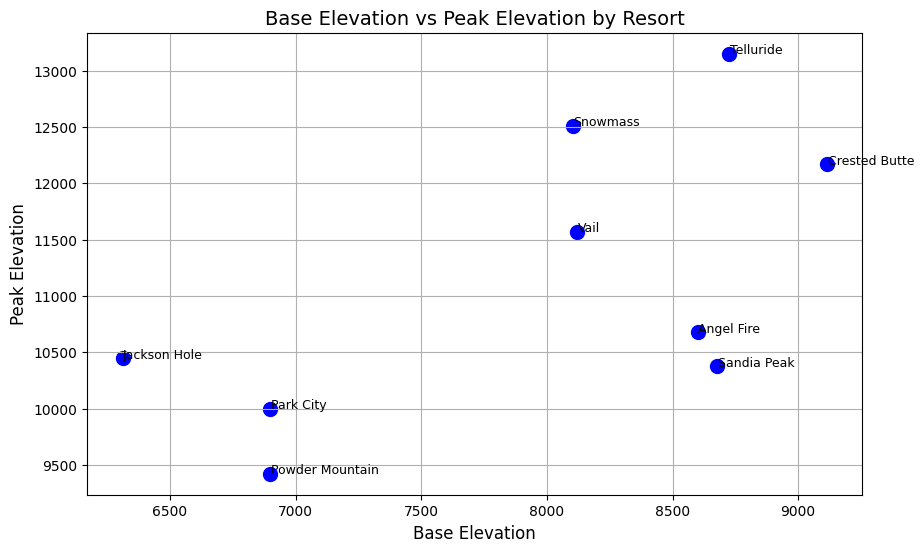

In [ ]:
# Scatterplot of peak elevation vs base elevation

plt.figure(figsize=(10, 6))
plt.scatter(merged_resorts['base_elevation'], merged_resorts['peak_elevation'], color='blue', s=100)

# Annotate each point with the resort name
for i, resort in enumerate(merged_resorts['resort']):
    plt.text(merged_resorts['base_elevation'][i] + 2, merged_resorts['peak_elevation'][i], resort, fontsize=9)

# Add labels and title
plt.xlabel('Base Elevation', fontsize=12)
plt.ylabel('Peak Elevation', fontsize=12)
plt.title('Base Elevation vs Peak Elevation by Resort', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

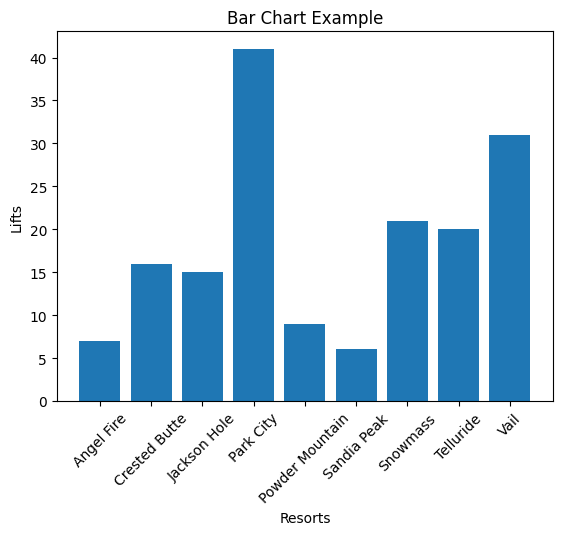

In [ ]:
# Bar chart of total lifts

# Sort 'resort' column in ascending order
sorted_resorts = merged_resorts.sort_values(by='resort')

# Create the bar chart with sorted resorts
plt.bar(sorted_resorts['resort'], sorted_resorts['total_lifts'])

# Add labels and title
plt.xlabel('Resorts')
plt.ylabel('Lifts')
plt.title('Bar Chart Example')
plt.xticks(rotation=45)  # Rotate labels 45 degrees

# Show the plot
plt.show()

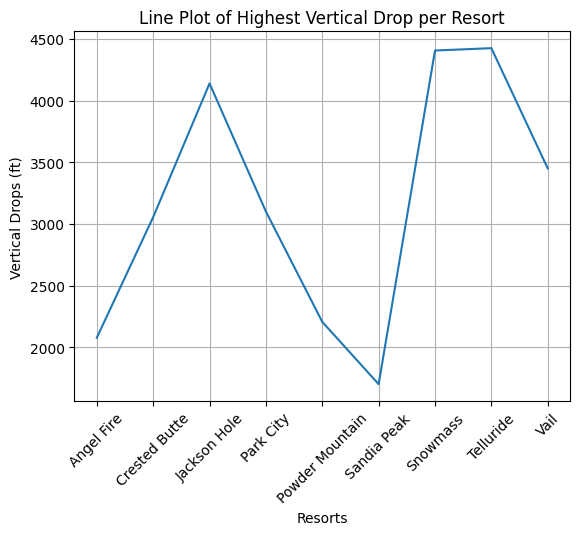

In [ ]:
# Line plot of vertical drops

sns.lineplot(x='resort', y='vertical_drop', data=sorted_resorts)

# Add labels and title
plt.xlabel('Resorts')
plt.ylabel('Vertical Drops (ft)')
plt.title('Line Plot of Highest Vertical Drop per Resort')
plt.xticks(rotation=45)  # Rotate labels 45 degrees

# Show the plot
plt.grid(True)
plt.show()

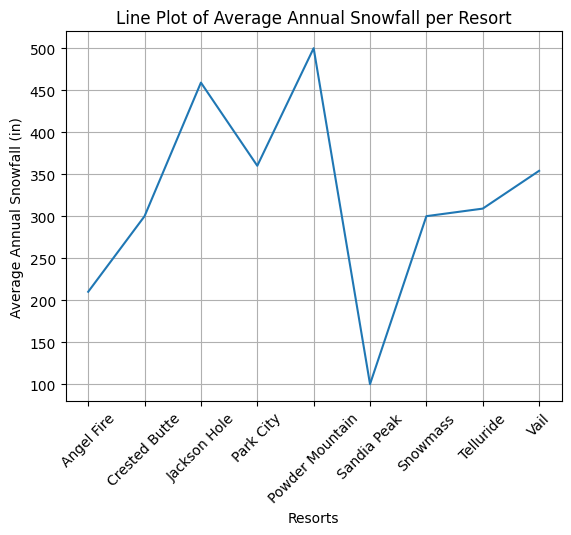

In [ ]:
# Line plot of average annual snowfall

sns.lineplot(x='resort', y='avg_annual_snowfall', data=sorted_resorts)

# Add labels and title
plt.xlabel('Resorts')
plt.ylabel('Average Annual Snowfall (in)')
plt.title('Line Plot of Average Annual Snowfall per Resort')
plt.xticks(rotation=45)  # Rotate labels 45 degrees

# Show the plot
plt.grid(True)
plt.show()

# Randomized Model


Travel order:

            resort           city       state  difficult_slopes  total_slopes  \
0             Vail           Vail    Colorado                93           234   
1    Crested Butte  Crested Butte    Colorado                25           121   
2      Sandia Peak    Albuquerque  New Mexico                 3            31   
3        Telluride      Telluride    Colorado                29            86   
4         Snowmass          Aspen    Colorado               111           236   
5     Jackson Hole  Teton Village     Wyoming                50           116   
6       Angel Fire     Angel Fire  New Mexico                 7            75   
7  Powder Mountain           Eden        Utah                55           135   
8        Park City      Park City        Utah                71           250   

   base_elevation  peak_elevation  vertical_drop  avg_annual_snowfall  \
0            8120           11570           3450                  354   
1            9115           

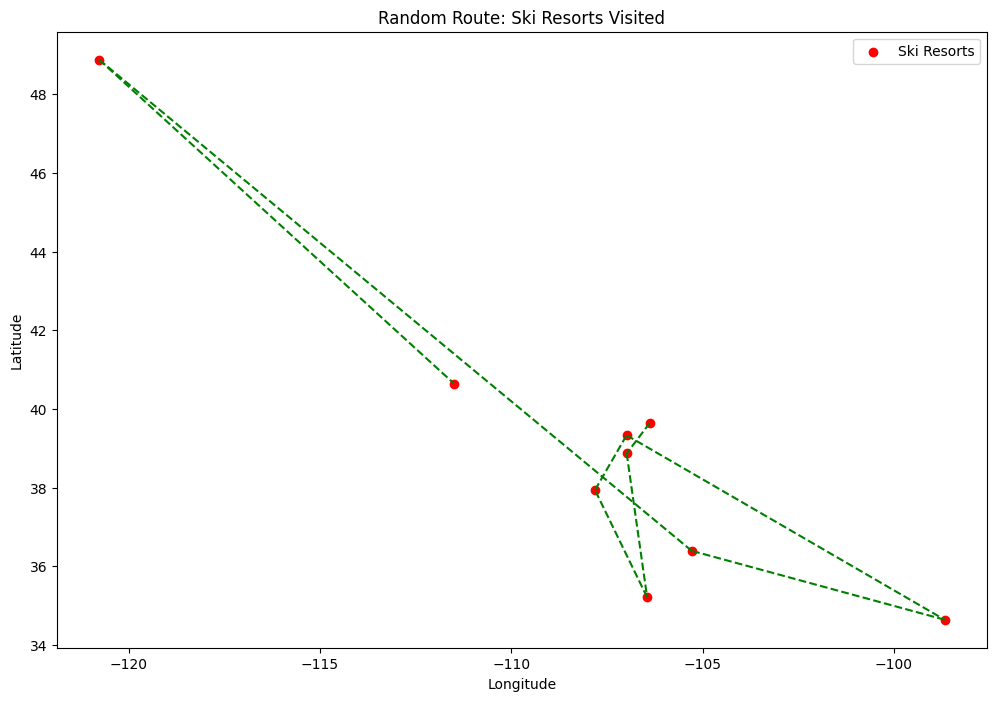

In [ ]:




# Haversine formula to calculate the distance between two lat and long points

def haversine(lat_1, lon_1, lat_2, lon_2):

    # Earths radius in km

    R = 6371

    # Converting latitude from degrees to radians

    rad_1 = math.radians(lat_1)
    rad_2 = math.radians(lat_2)

    # Calculating the difference in latitude and longitude and converting from degrees to radians

    diff_lat = math.radians(lat_2 - lat_1)
    diff_lon = math.radians(lon_2 - lon_1)

    # Implementing the Haversine formula to calculate distance between resorts

    a = math.sin(diff_lat / 2)**2 + math.cos(rad_1) * math.cos(rad_2) * math.sin(diff_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers

    distance_km = R * c

    #Convert distance from kilometers to miles

    distance_miles = distance_km * 0.621371

    return distance_miles

# Create df

resorts = pd.DataFrame(merged_resorts)

# Shuffling resorts randomly (each resort is visited only once)

shuffled_resorts = resorts.sample(frac=1, random_state = 12345).reset_index(drop = True)

# Printing shuffled resorts

print("Travel order:")
print()
print(shuffled_resorts[['resort', 'city', 'state', 'difficult_slopes', 'total_slopes', 'base_elevation',
                        'peak_elevation', 'vertical_drop', 'avg_annual_snowfall', 'nightskiing', 'total_lifts']])
print()

# Calculating total distance traveled

total_distance_miles = 0

# Loop through the shuffled resorts and calculate the distance between consecutive resorts

for i in range(len(shuffled_resorts) - 1):

    # The lat and long coordinates for the current and next resort

    current_resort = shuffled_resorts.loc[i]
    next_resort = shuffled_resorts.loc[i + 1]

    current_coords = (current_resort['latitude'], current_resort['longitude'])
    next_coords = (next_resort['latitude'], next_resort['longitude'])

    # Calculating the distance traveled

    distance_miles = haversine(current_coords[0], current_coords[1], next_coords[0], next_coords[1])

    # Printing the distance between the current and next resort

    print(f"Distance from {current_resort['resort']} to {next_resort['resort']}: {distance_miles:.2f} miles")
    print()

    # Add the distance to the total distance

    total_distance_miles += distance_miles

# Printing total distance traveled

print(f"Total distance traveled (Haversine): {total_distance_miles:.2f} miles")

# Plotting the random model

plt.figure(figsize = (12, 8))

plt.scatter(resorts['longitude'], resorts['latitude'], color='red', label='Ski Resorts')

# Plotting the route in the shuffled order

for i in range(len(shuffled_resorts) - 1):

    plt.plot([shuffled_resorts.loc[i, 'longitude'], shuffled_resorts.loc[i + 1, 'longitude']],

             [shuffled_resorts.loc[i, 'latitude'], shuffled_resorts.loc[i + 1, 'latitude']],

             color = 'green', linestyle = '--')

plt.xlabel('Longitude')

plt.ylabel('Latitude')

plt.title('Random Route: Ski Resorts Visited')

plt.legend()

plt.show()

# Optimized Model

Optimal Travel Order:
Crested Butte - Crested Butte, Colorado
Snowmass - Aspen, Colorado
Vail - Vail, Colorado
Telluride - Telluride, Colorado
Angel Fire - Angel Fire, New Mexico
Sandia Peak - Albuquerque, New Mexico
Jackson Hole - Teton Village, Wyoming
Park City - Park City, Utah
Powder Mountain - Eden, Utah

Total distance traveled (Optimized using Nearest Neighbor): 2474.41 miles


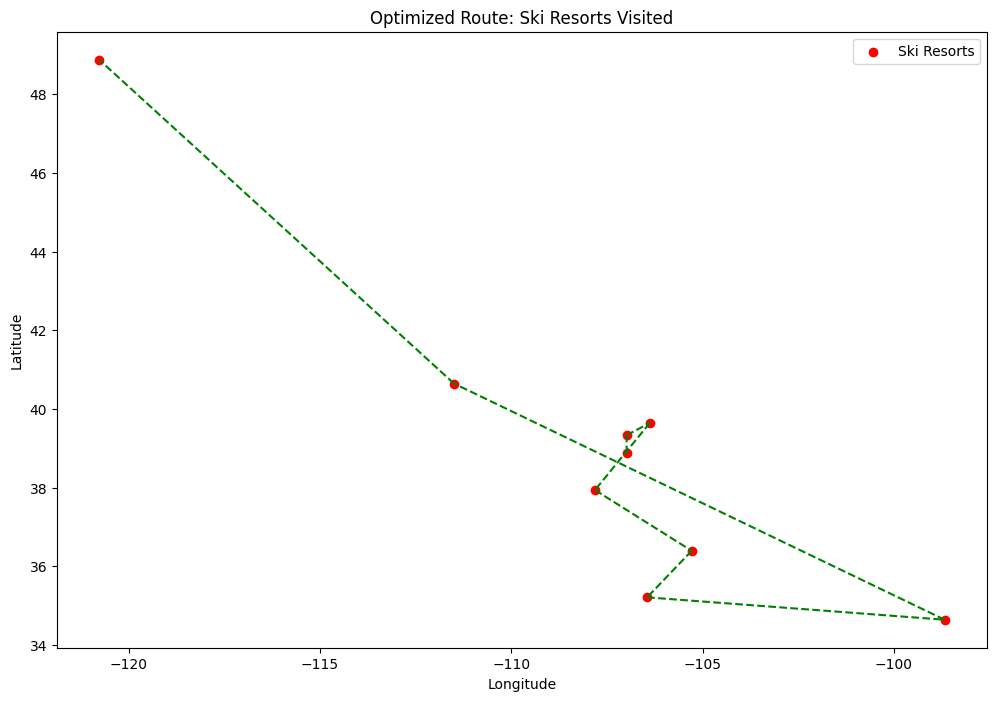

In [ ]:
# Implementing the Nearest Neighbor algorithm

def nearest_neighbor_algorithm(resorts):

    current_resort = resorts.iloc[0]

    resorts_new = resorts.iloc[1:].copy()

    route = [current_resort]

    total_distance = 0

    while len(resorts_new) > 0:

        # Distance from the current resort to the newly visited ones

        distances = resorts_new.apply(lambda x: haversine(current_resort['latitude'], current_resort['longitude'], x['latitude'], x['longitude']), axis=1)

        nearest_resort_index = distances.idxmin()

        nearest_resort = resorts_new.loc[nearest_resort_index]

        # Adding the nearest resort to the route and removing it to indicate it has been visted

        route.append(nearest_resort)

        total_distance += distances.min()

        resorts_new = resorts_new.drop(nearest_resort_index)

        # Updating the current resort to the nearest_resort

        current_resort = nearest_resort

    return route, total_distance

# Using the Nearest Neighbor algorithm to get the optimal route

optimal_route, total_distance_miles = nearest_neighbor_algorithm(resorts)

# Printing the optimal route and distance

print("Optimal Travel Order:")

for resort in optimal_route:

    print(f"{resort['resort']} - {resort['city']}, {resort['state']}")

print(f"\nTotal distance traveled (Optimized using Nearest Neighbor): {total_distance_miles:.2f} miles")

# Preparing the travel data for JSON

travel_data = []

travel_distances = []

# Calculating the individual distances between resorts

for i in range(len(optimal_route) - 1):

    current_resort = optimal_route[i]

    next_resort = optimal_route[i + 1]

    distance_miles = haversine(current_resort['latitude'], current_resort['longitude'], next_resort['latitude'], next_resort['longitude'])

    travel_distances.append({

        'from_resort': current_resort['resort'],

        'from_city': current_resort['city'],

        'from_state': current_resort['state'],

        'to_resort': next_resort['resort'],

        'to_city': next_resort['city'],

        'to_state': next_resort['state'],

        'distance_miles': round(distance_miles, 2)
    })

travel_data.append({

    'total_distance_miles': round(total_distance_miles, 2),

    'individual_distances_miles': travel_distances,

    'travel_order': [{'resort': resort['resort'], 'city': resort['city'], 'state': resort['state']} for resort in optimal_route]
})


# Saving the data as a JSON file

with open('optimal_resorts_data_with_distances.json', 'w') as json_file:

    json.dump(travel_data, json_file, indent = 4)

# Plotting the optimal route

plt.figure(figsize = (12, 8))

# Plotting the resorts

plt.scatter(resorts['longitude'], resorts['latitude'], color = 'red', label = 'Ski Resorts')

# Plotting the optimal route

for i in range(len(optimal_route) - 1):

    plt.plot([optimal_route[i]['longitude'], optimal_route[i + 1]['longitude']],

             [optimal_route[i]['latitude'], optimal_route[i + 1]['latitude']],

             color = 'green', linestyle = '--')

plt.xlabel('Longitude')

plt.ylabel('Latitude')

plt.title('Optimized Route: Ski Resorts Visited')

plt.legend()

plt.show()